### Avacado Project
<b> Problem Statement:</b>
<em><b>
Avocado is a fruit consumed by people heavily in the United States. 
</b></em>

Content : 
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
     
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

- <b>Some relevant columns in the dataset:

    - Date - The date of the observation
    - AveragePrice - the average price of a single avocado
    - type - conventional or organic
    - year - the year
    - Region - the city or region of the observation
    - Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold </b>

<b> Inspiration /Label </b>

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

<b>To download the dataset, use the link given below. 

Downlaod Files:</b>
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Avocado Csv file using pandas

In [3]:
df=pd.read_csv('avocado.csv')

In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [48]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
season            int32
dtype: object

# checking correletion

In [13]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


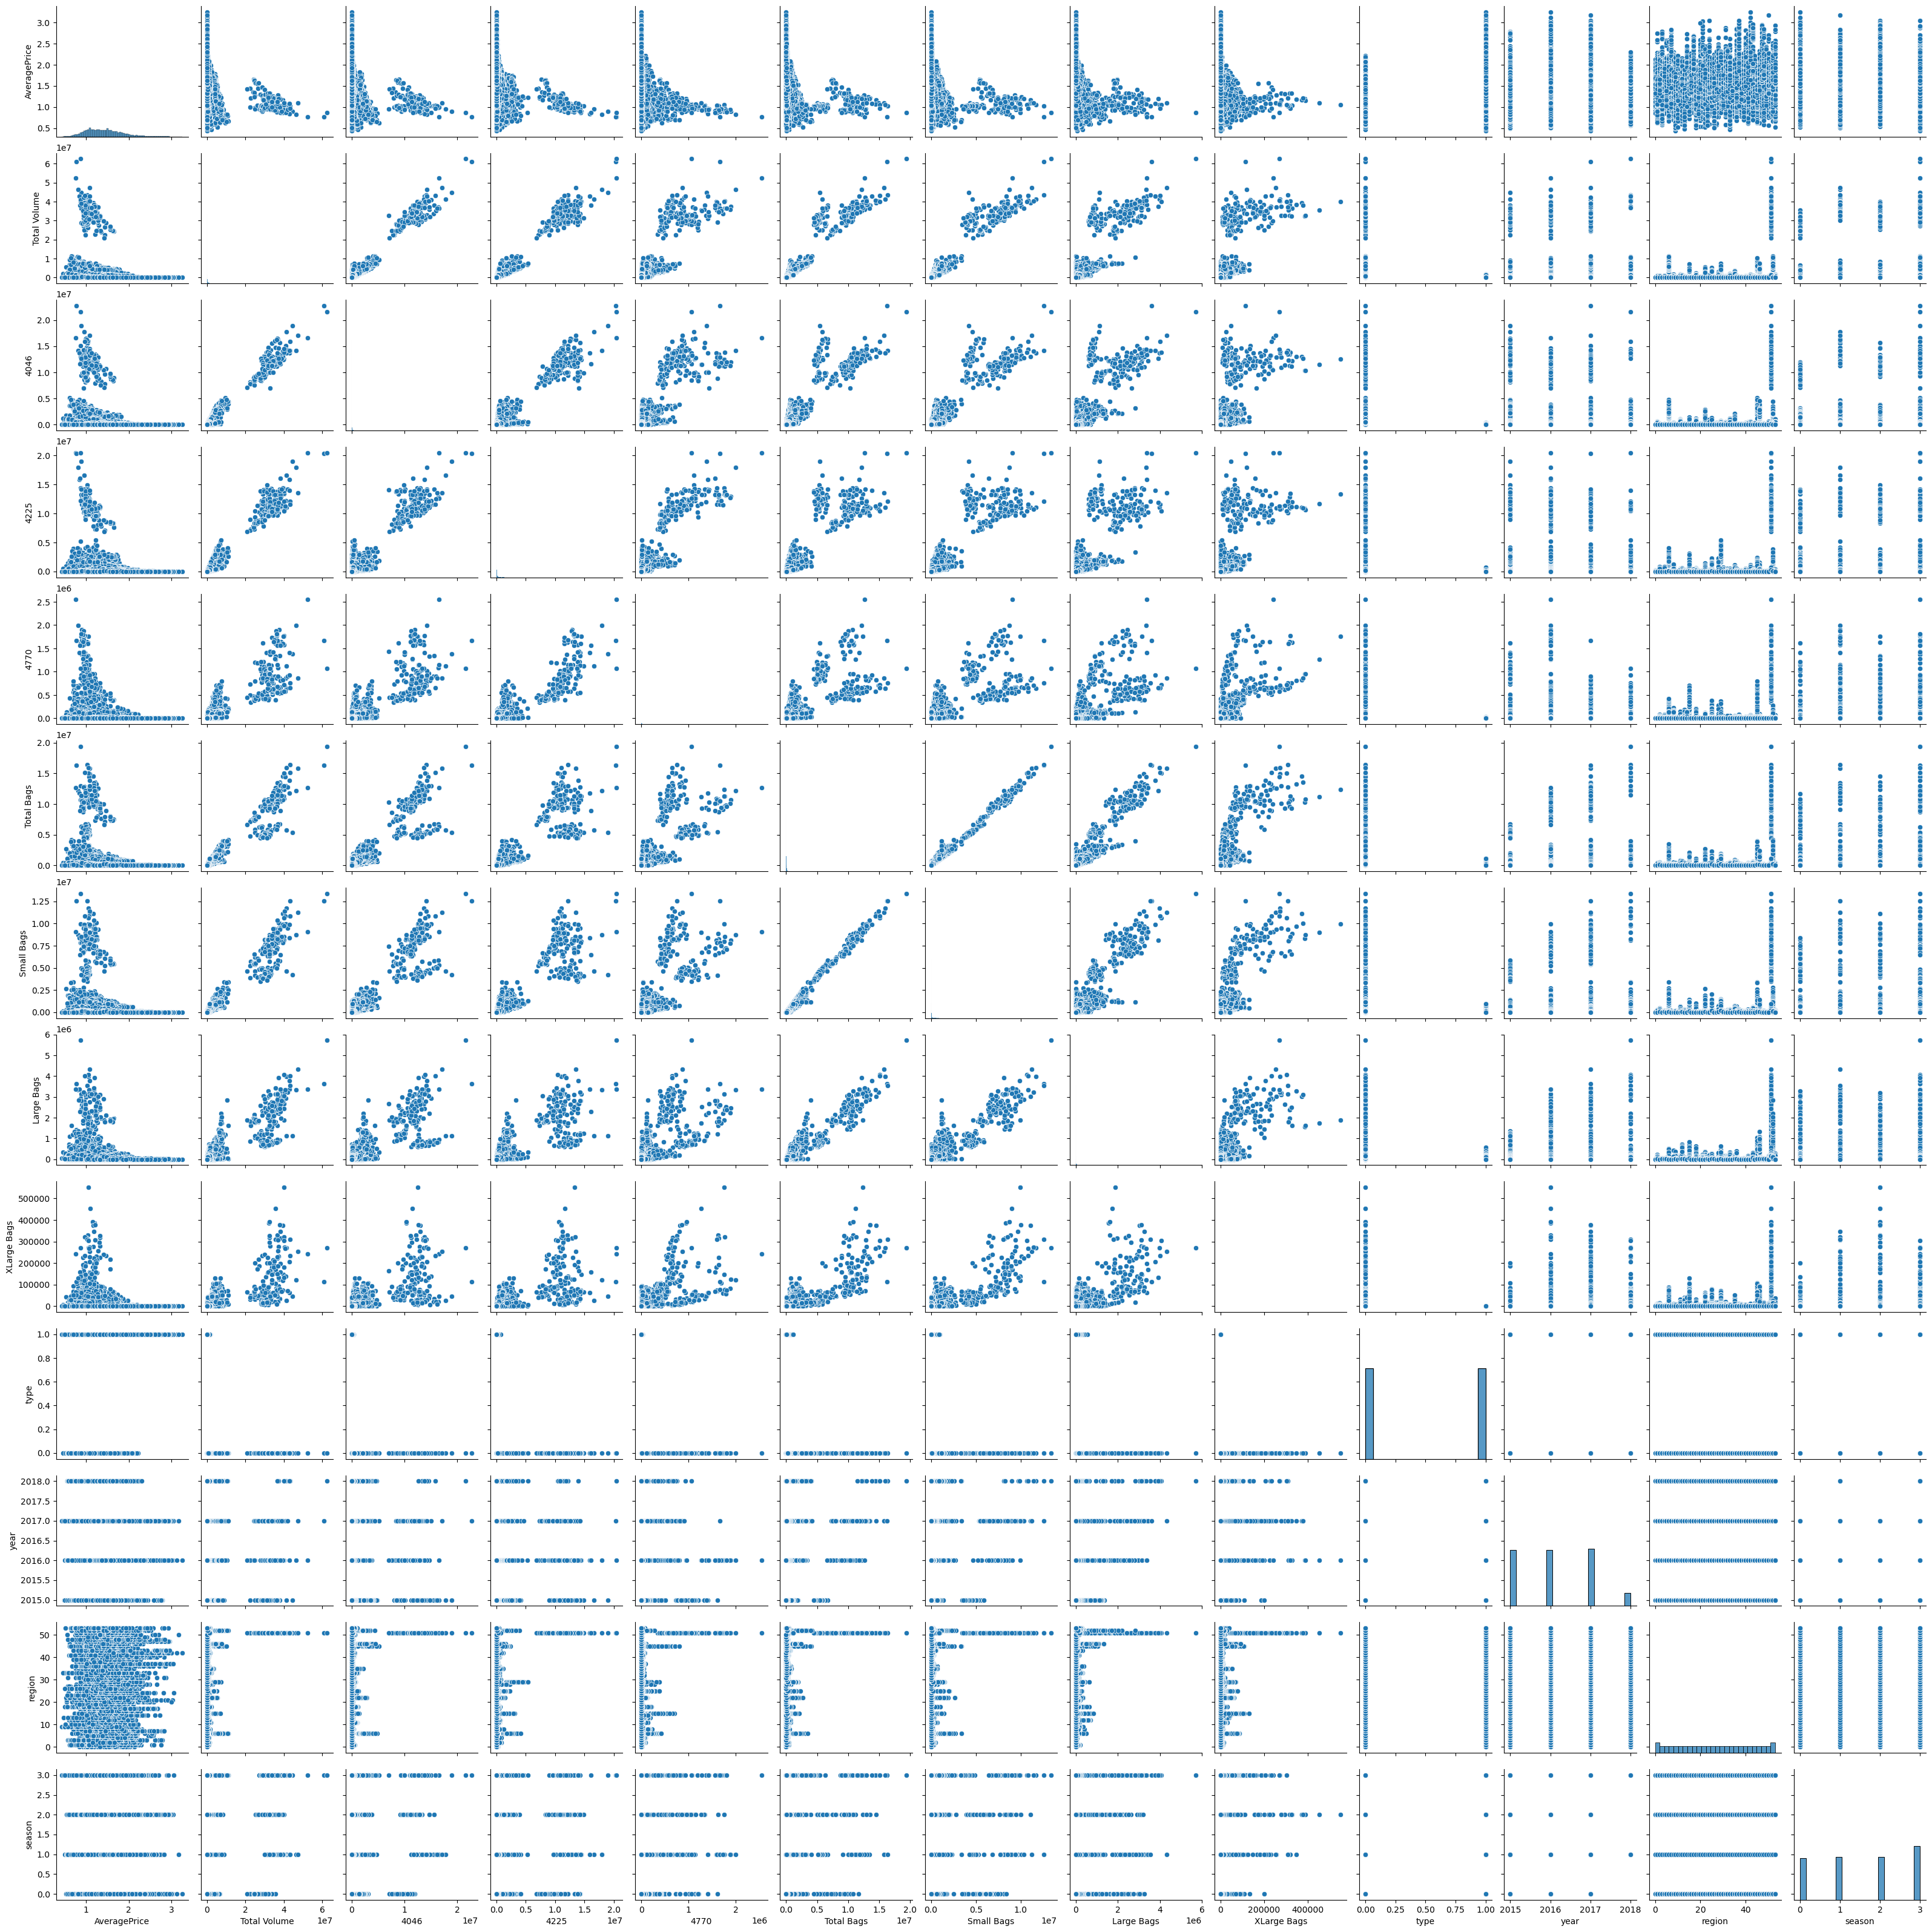

In [44]:
sns.pairplot(data=df)

<Axes: >

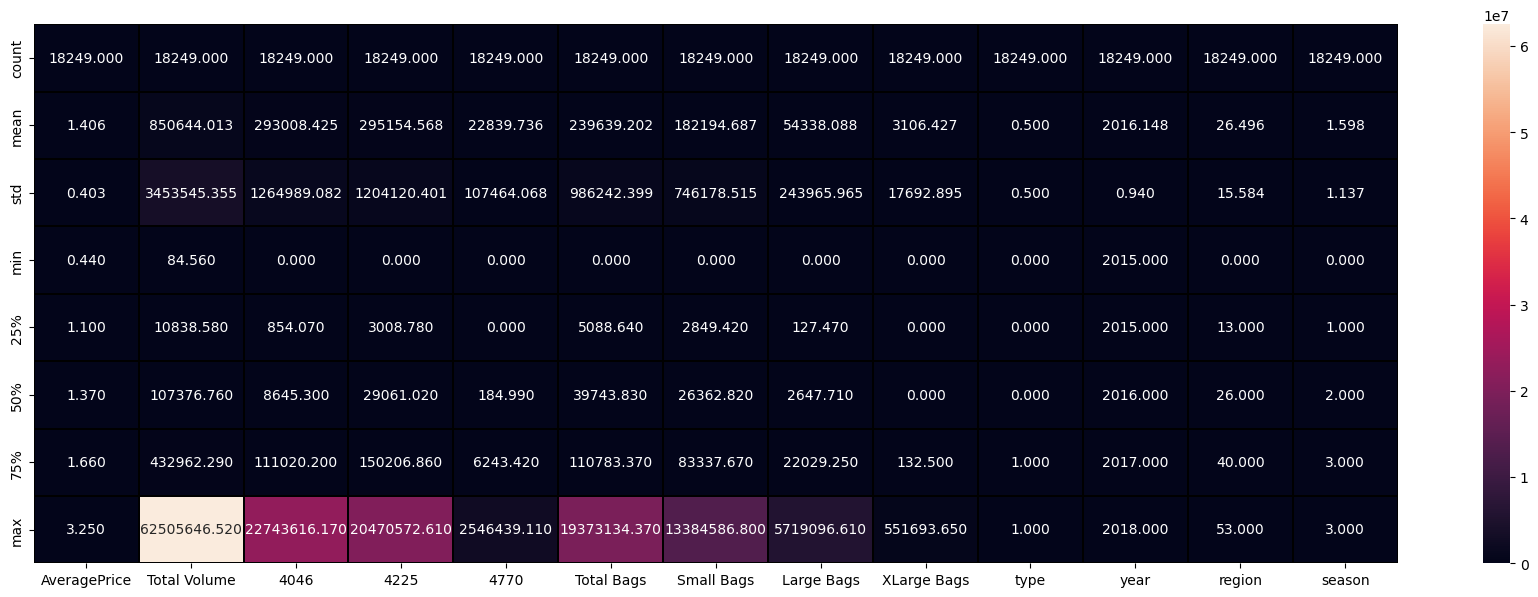

In [46]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.3f')


<Axes: >

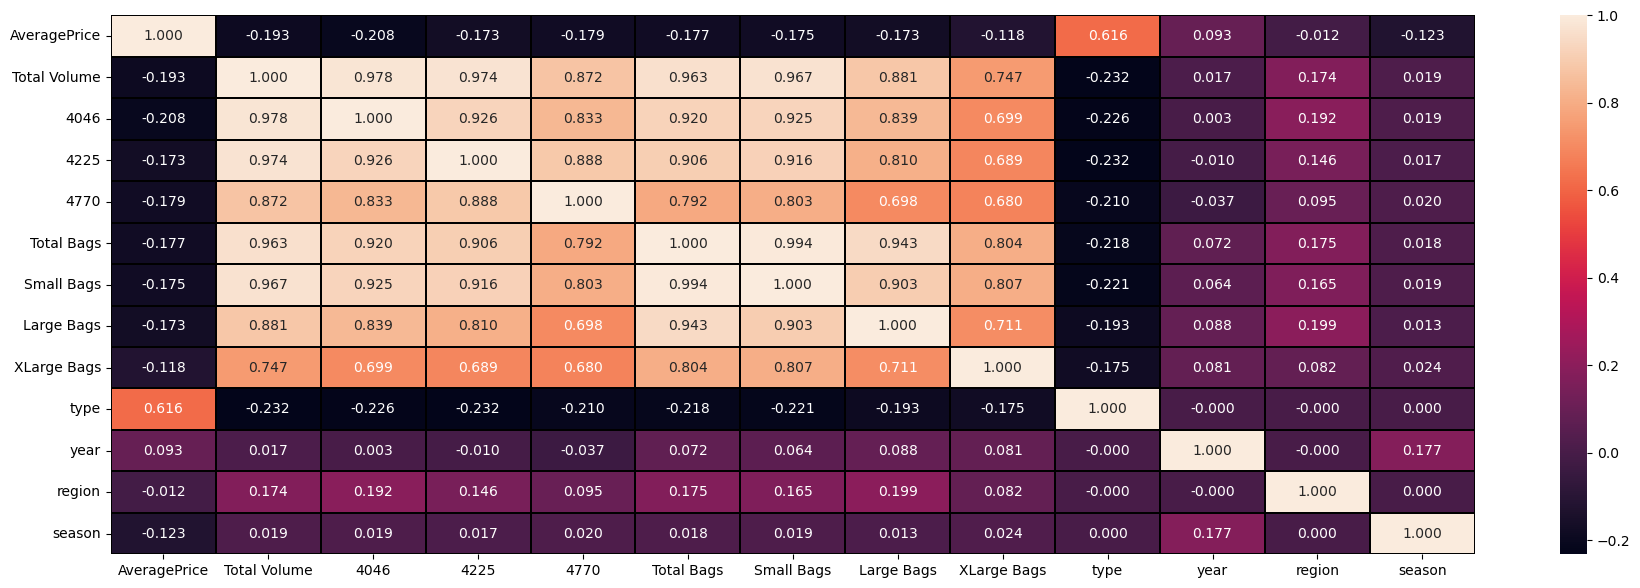

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.3f')

In [15]:
# convert the type of Date feature from obj to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# categorizing into several seasons
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [20]:
# creating a new feature 'season' and assign the corresponding season for the Date using map function over our season_of_date function
df['season'] = df.Date.map(season_of_date)

In [22]:
# now, we can see the season feature appended at the last
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,autumn
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,autumn
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,autumn
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,autumn
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,autumn
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,autumn


In [23]:
# no of observations for each seasons
df.season.value_counts()

winter    5400
summer    4319
spring    4319
autumn    4211
Name: season, dtype: int64

In [24]:
# droping date feature
df = df.drop(['Date'],axis = 1)

# Data Preprocessing

In [27]:
# converting categorical features of text data into model-understandable numerical data
label_cols = ['type','region','season']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda x : label.fit_transform(x))

In [28]:
# Scaling the features and 
# spliting the label encoded features into distinct features inorder to prevent our model to think that columns have data with some kind of order or hierarchy
# column_tranformer allows us to combine several feature extraction or transformation methods into a single transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scale_cols = df.drop(['AveragePrice','type','year','region','season'],axis=1)
col_trans = make_column_transformer(
            (OneHotEncoder(), df[label_cols].columns),
            (StandardScaler(), scale_cols.columns),
            remainder = 'passthrough')

### Train Test Split

In [29]:
# splitting our dataset into train and test set such that 20% of observations are considered as test set
X = df.drop(['AveragePrice'],axis=1)
y = df.AveragePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Regression Models
1. Linear Regression

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
pipe = make_pipeline(col_trans,linreg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [31]:

y_pred_test = pipe.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.19362325771844566
MSE for testing set: 0.0650739866576534
RMSE for testing set: 0.25509603418644794


# 2. Support Vector Regressor (SVR)

In [33]:
from sklearn.svm import SVR
svr = SVR()
pipe = make_pipeline(col_trans,svr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('svr', SVR())])

In [34]:
y_pred_test = pipe.predict(X_test)

In [39]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.12671506849315067
MSE for testing set: 0.03716041095890411
RMSE for testing set: 0.1927703580919642


# 3. Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
pipe = make_pipeline(col_trans,dr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [37]:
y_pred_test = pipe.predict(X_test)

In [40]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.12671506849315067
MSE for testing set: 0.03716041095890411
RMSE for testing set: 0.1927703580919642


# 4. Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
pipe = make_pipeline(col_trans,forest_model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [41]:
y_pred_test = pipe.predict(X_test)

In [42]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.09666268493150686
MSE for testing set: 0.01897346793972602
RMSE for testing set: 0.13774421200081702


<Axes: xlabel='AveragePrice', ylabel='Density'>

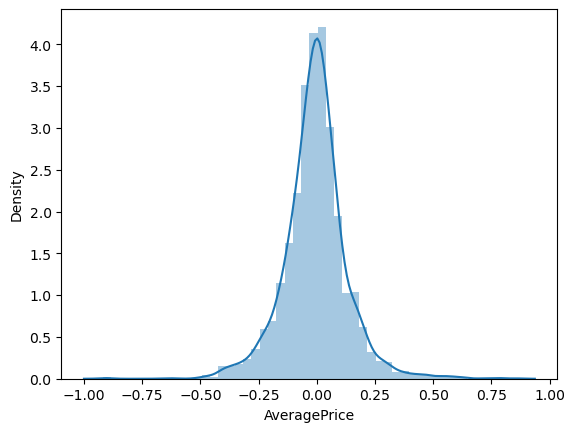

In [43]:
sns.distplot((y_test-y_pred_test),bins=50)


Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

RandomForestRegressor overperfomed LinearRegression, SVR and DecisionTreeRegressor with an RMSE of 0.147.

We can increase the performance to some more extent by tweaking the parameters of the models (especially for the models like RandomForestRegressor and DecisionTreeRegressor) and can use hyperparameter tuning techniques such as GridSearchCV and RandomizedSearchCV to find out the best parameters for our models.